In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

%matplotlib inline

In [2]:
# Importing the Data into pandas DataFrame

raw_Data = pd.read_csv('/Users/pritigirishvankudre/DayX_Lockdown Practice/WOMart_Sale/TRAIN.csv')
raw_Data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
# Extracting Data Information

raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [4]:
# Describing the Data

raw_Data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [5]:
# To find and remove duplicate rows if any

duplicate = raw_Data[raw_Data.duplicated()]
print (duplicate)

Empty DataFrame
Columns: [ID, Store_id, Store_Type, Location_Type, Region_Code, Date, Holiday, Discount, #Order, Sales]
Index: []


In [6]:
# Method to understand Unique values distribution

col_uniq = pd.DataFrame(raw_Data.nunique()).reset_index()
col_uniq.columns = ['DataColumns','UniqCount']
col_uniq_cnt = pd.DataFrame(raw_Data.count(axis=0)).reset_index()
col_uniq_cnt.columns = ['DataColumns','UniqCount']
col_uniq['UniqCount_Pct'] = round((col_uniq['UniqCount']/col_uniq_cnt['UniqCount'])*100,2)
display (col_uniq)

,DataColumns,UniqCount,UniqCount_Pct
0,ID,188340,100.00
1,Store_id,365,0.19
2,Store_Type,4,0.00
3,Location_Type,5,0.00
4,Region_Code,4,0.00
5,Date,516,0.27
6,Holiday,2,0.00
7,Discount,2,0.00
8,#Order,299,0.16
9,Sales,47422,25.18


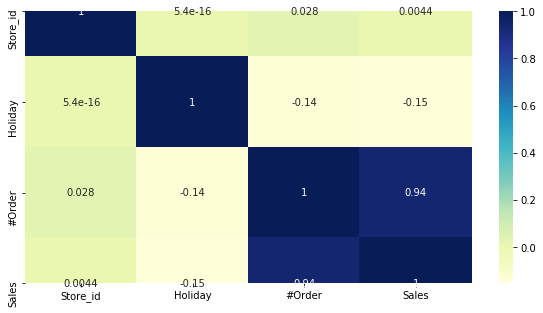

In [7]:
plt.figure(figsize=(10, 5))

# plotting correlation heatmap
dataplot = sns.heatmap(raw_Data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [8]:
# Converting date column into a feature

raw_Data['Date'] = pd.to_datetime(raw_Data['Date'])
raw_Data['Date_YYYY'] = raw_Data['Date'].dt.year
raw_Data['Date_MM'] = raw_Data['Date'].dt.month
raw_Data['Date_DD'] = raw_Data['Date'].dt.day
raw_Data.drop('Date', axis=1, inplace=True)
raw_Data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Date_YYYY,Date_MM,Date_DD
0,T1000001,1,S1,L3,R1,1,Yes,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,1,Yes,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,1,Yes,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,1,Yes,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,1,Yes,62,45614.52,2018,1,1


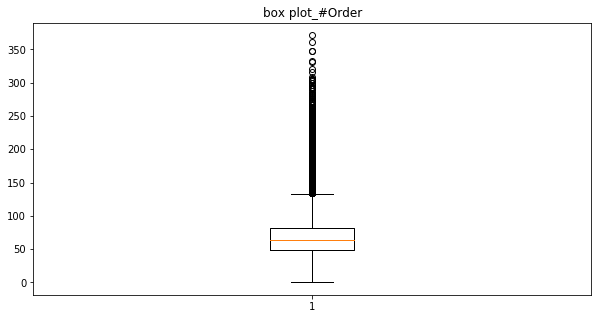

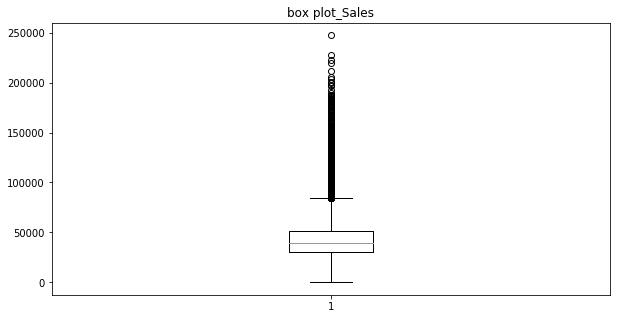

In [9]:
#Understanding Outliers

plt.figure(figsize=(10, 5))

plt.boxplot(raw_Data['#Order'])
plt.title('box plot_#Order')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(raw_Data['Sales'])
plt.title('box plot_Sales')
plt.show()

In [10]:
# Define Common Function to train the model

def train_model(regressor, train_x, train_y, test_x, test_y):
    
    # fit the training dataset on the classifier
    regressor.fit(train_x, train_y)
    
    # predict the labels on validation dataset
    predictions = regressor.predict(test_x)
    
    return (mean_squared_log_error(test_y, predictions))

# Building Model with Oultliers on

In [11]:
raw_Data_train_Qt = raw_Data.copy()

#Removing column ID

raw_Data_train_Qt.drop('ID', axis=1, inplace=True)

#OHE for categorical variable
raw_Data_train_Qt = pd.get_dummies(raw_Data_train_Qt, columns=['Store_Type','Location_Type','Region_Code',
                                                               'Discount'], drop_first=False)

raw_Data_train_Qt.head()

,Store_id,Holiday,#Order,Sales,Date_YYYY,Date_MM,Date_DD,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
0,1,1,9,7011.84,2018,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,253,1,60,51789.12,2018,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,252,1,42,36868.20,2018,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,251,1,23,19715.16,2018,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,250,1,62,45614.52,2018,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [12]:
#Creating Train and Test split

X = raw_Data_train_Qt.drop(['#Order','Sales'], axis=1)
y = raw_Data_train_Qt[['#Order','Sales']]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)

In [13]:
# RandomForest Regression
mean_squared_log_error_rfr = train_model(RandomForestRegressor(n_estimators=100), train_x, train_y, test_x, test_y)
print ("\n RFR, mean_squared_log_error: \n", mean_squared_log_error_rfr*1000)


 RFR, mean_squared_log_error: 
 49.92626191467694


# Predicting Sales on Test File

In [14]:
# Importing the Data into pandas DataFrame

raw_Data_test = pd.read_csv('/Users/pritigirishvankudre/DayX_Lockdown Practice/WOMart_Sale/TEST_FINAL.csv')
raw_Data_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [15]:
# Extracting Data Information

raw_Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [16]:
# Converting date column into a feature

raw_Data_test['Date'] = pd.to_datetime(raw_Data_test['Date'])
raw_Data_test['Date_YYYY'] = raw_Data_test['Date'].dt.year
raw_Data_test['Date_MM'] = raw_Data_test['Date'].dt.month
raw_Data_test['Date_DD'] = raw_Data_test['Date'].dt.day
raw_Data_test.drop('Date', axis=1, inplace=True)

In [17]:
#OHE for categorical variable
raw_Data_test = pd.get_dummies(raw_Data_test, columns=['Store_Type','Location_Type','Region_Code',
                                                               'Discount'], drop_first=False)

In [18]:
# Common function to test model

def test_model(regressor, train_x, train_y, test_x):

    # fit the training dataset on the classifier
    regressor.fit(train_x, train_y)
    
    # predict the labels on validation dataset
    predictions = regressor.predict(test_x)
    
    return (predictions)

In [19]:
# RandomForest Model to test

prediction_RFR = test_model(RandomForestRegressor(n_estimators=100), train_x, train_y, raw_Data_test.iloc[:, 1:])
raw_Data_test[['#Order','Sales']] = pd.DataFrame(prediction_RFR)
raw_Data_test.to_csv('RFR_OUT_GCV_Test_1909_05_2300.csv', columns=['ID','Sales'], header=True, index=False)
raw_Data_test.drop(['Sales','#Order'], axis=1, inplace=True)